## **Aprendizaje profundo - MLP con Early Stopping y Dropout (Core)**

### **MLP con Early Stopping y Dropout (Core)**


En esta actividad, implementarás una red MLP más avanzada, utilizando técnicas como dropout y early stopping para evitar el sobreajuste. El dataset seleccionado es el «Heart Disease UCI» de Kaggle, donde se intentará predecir si un paciente tiene una enfermedad cardíaca o no basándose en varias características.

**Enlace al dataset:** https://www.kaggle.com/ronitf/heart-disease-uci



### **Objetivo:**

El objetivo de esta actividad es entrenar una red MLP utilizando dropout para regularizar la red y early stopping para detener el entrenamiento cuando el rendimiento en el conjunto de validación deje de mejorar. Al final, se comparará el rendimiento de este modelo con el de un MLP básico.



### **Instrucciones:**

#### 1. **Carga de datos:**
- Descarga el dataset «Heart Disease UCI» de Kaggle. Explora las características que están relacionadas con la edad, el sexo, la presión arterial y otras variables clínicas.
- Verifica si hay valores nulos en el dataset y realiza el preprocesamiento necesario, como la imputación de valores faltantes y la normalización de las variables numéricas.

#### 2. **Exploración y preprocesamiento de datos:**
- Realiza una división del dataset en conjunto de entrenamiento y prueba. Asegúrate de que el dataset esté bien balanceado, verificando la distribución de la variable objetivo (enfermedad cardíaca sí/no).

#### 3. **Implementación de la MLP con Dropout:**
- Implementa una red MLP con dos capas ocultas utilizando Keras o cualquier biblioteca de deep learning.
- Agrega capas de dropout después de cada capa oculta para reducir el riesgo de sobreajuste. Utiliza una tasa de dropout del 20-30%.
- Implementa el early stopping para detener el entrenamiento cuando la precisión en el conjunto de validación deje de mejorar después de varias épocas (por ejemplo, paciencia de 5 épocas).

#### 4. **Entrenamiento del modelo:**
- Entrena el modelo con early stopping activado, utilizando el optimizador Adam y la función de pérdida binaria (binary_crossentropy). Entrena durante un máximo de 100 épocas.
- Visualiza las curvas de aprendizaje para observar cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento, especialmente con early stopping activado.

#### 5. **Evaluación del modelo:**
- Evalúa el modelo en el conjunto de prueba y compara las métricas de rendimiento, como precisión, recall, F1-score y matriz de confusión.
- Discute cómo el uso de dropout y early stopping ha afectado el rendimiento en comparación con un MLP básico sin estas técnicas.

Librerias y Dataset

In [1]:
# pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import tensorflow as tf


In [3]:
# Obtener el dataset
heart_disease = fetch_ucirepo(id=45)

# Obtener X e y del dataset
X = heart_disease.data.features 
y = heart_disease.data.targets

Eliminamos NaN en X, y tambien las filas correspondientes en y

In [4]:
# Imprimir la forma original de X y la forma después de eliminar NaN
print(X.shape)
print(X.dropna().shape)

# Eliminar filas con valores NaN de X y mantener el índice original
X_cleaned = X.dropna()

# Eliminar las filas correspondientes en y usando el índice de X_cleaned
y_cleaned = y.loc[X_cleaned.index]

# Asignar los datos limpios de vuelta a X y y
X = X_cleaned
y = y_cleaned

# Imprimir la nueva forma de y
print(y.shape)

(303, 13)
(297, 13)
(297, 1)


Convertimos a binario la variable objetivo

In [5]:
# Convertir y en una variable binaria: 0 = sin enfermedad, 1 = con enfermedad
y_binary = np.where(y > 0, 1, 0)

print(np.unique(y_binary))  # Debería mostrar solo [0, 1]

[0 1]


Normalizamos

In [6]:
# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

Creamos y entrenamos el modelo

In [7]:
# Modelo MLP con Dropout
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

# Compilación
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

# Entrenamiento
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

# Predicción y evaluación
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nMétricas de Evaluación:")
print(classification_report(y_test, y_pred))



2/2 [==============================] - 0s 17ms/step

Métricas de Evaluación:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        36
           1       0.88      0.92      0.90        24

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



Visualizamos las metricas

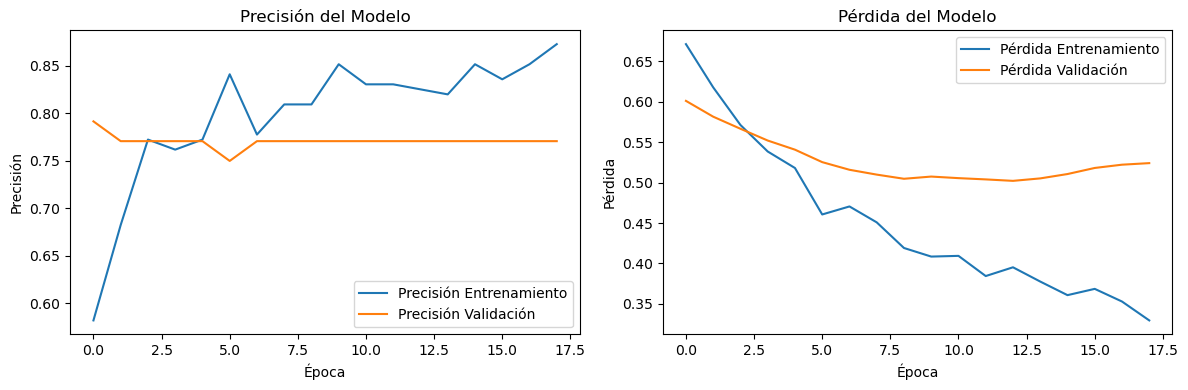

In [8]:
# Visualización de curvas de aprendizaje
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()